In [ ]:
!python -m pip install -r requirements.txt

In [1]:
from glob import glob

from PIL import Image
import numpy as np

pathname = 'crowd-counting/frames/frames/*.jpg'
images = sorted([image for image in glob(pathname, recursive=False)])
m = len(images)
for i in range(m):
    with Image.open(images[i]) as image:
        snapshot = np.array(image)[16:].reshape(-1)
        if i == 0:
            x_upper = np.empty((len(snapshot), m), dtype=np.uint8)
        x_upper[:, i] = snapshot

In [2]:
from pydmd import DMD

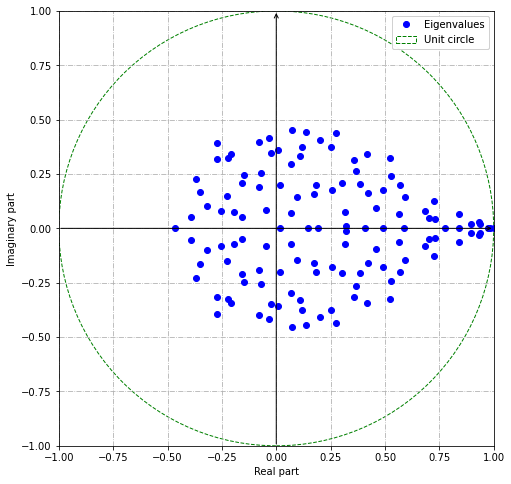

In [3]:
dmd = DMD(svd_rank=0.99, exact=True).fit(x_upper[:, :500])
dmd.plot_eigs()

In [4]:
background = x_upper[:, :500] - np.round(dmd.reconstructed_data.real)

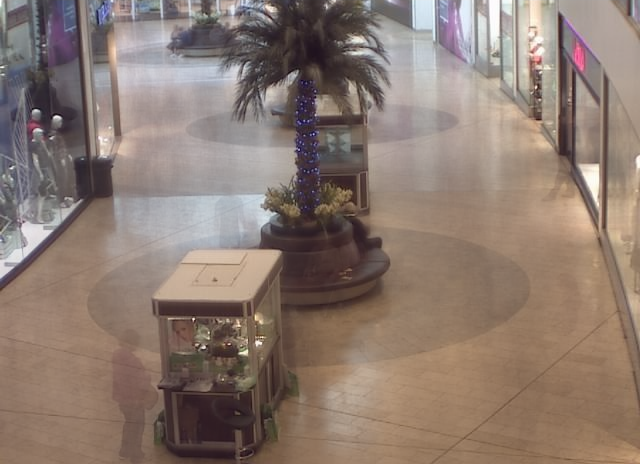

In [26]:
Image.fromarray((x_upper[:, :500] - background.astype(np.uint8))[:, 16].reshape(464, 640, 3))

In [ ]:
dmd = DMD(svd_rank=500, exact=True).fit(x_upper[:, :500])
dmd.plot_eigs()

In [ ]:
dmd = DMD(svd_rank=0.999, exact=True).fit(x_upper[:, :500])
dmd.plot_eigs()